In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Kmeans:
    def __init__(self, clusters, max_iterations = 9):
        self.clusters = clusters
        self.max_iterations = max_iterations
       

    def initialize_centers(self, X):
        random_index = np.random.permutation(X.shape[0])
        centers_initial = X[random_index[:self.clusters]]
        return centers_initial

    def compute_centers(self, X, labels):
        centers = np.zeros((self.clusters, X.shape[1]))
        for k in range(self.clusters):
            centers[k, :] = np.mean(X[labels == k, :], axis = 0)
        return centers

    def compute_distance(self, X, centers):
        distance = np.zeros((X.shape[0], self.clusters))
        for k in range(self.clusters):
            distance[:,k] = np.linalg.norm(X - centers[k], axis=1)   
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis = 1)

    def compute(self, X, labels, centers):
        distance = np.zeros(X.shape[0])
        for k in range(self.clusters):
            distance[labels == k] = norm(X[labels == k] - centers[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centers = self.initialize_centers(X)
        for i in range(self.max_iterations):
            centers_old = self.centers
            distance = self.compute_distance(X, centers_old)
            self.labels = self.find_closest_cluster(distance)
            self.centers = self.compute_centers(X, self.labels)
        self.error = self.compute(X, self.labels, self.centers)
    
    def predict(self, X):
        distance = self.compute_distance(X, centers_old)
        return self.find_closest_cluster(distance)

In [3]:
data_1 = np.array(list(zip(np.random.normal(4,1,  size=250),
                       np.random.normal(5, 1,  size=250))))
data_2 = np.array(list(zip(np.random.normal(2,1,  size=250),
                       np.random.normal(10, 1,  size=250))))
data_3 = np.array(list(zip(np.random.normal(2,1,  size=250),
                       np.random.normal(1, 1,  size=250))))


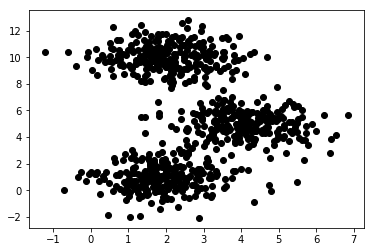

In [4]:
data = np.concatenate((data_1, data_2, data_3), axis = 0)
#let’s scatter the  unclustered data.
plt.scatter(data[:,0],data[:,1],c='black');

In [5]:
centers_array = []
max_iterations = 9
clusters = 3
kmeans = Kmeans(clusters = 3, max_iterations = 9)
for i in range(max_iterations):
    kmeans.fit(data)
    centers = kmeans.centers
    centers_array.append(centers)

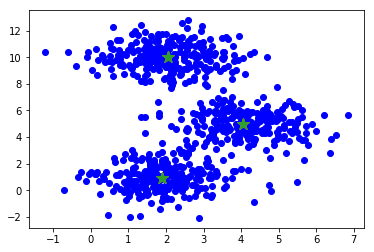

In [6]:
plt.scatter(data[:,0],data[:,1],c='b')
for centroid in kmeans.centers:
    plt.scatter(kmeans.centers[: ,0], kmeans.centers[:, 1], s = 150, marker = "*")
plt.show()   